Wholesale customers là dataset phục vụ cho bài toán customer segmentation dựa vào một số thông tin và hành vi của khách hàng
- Đọc dữ liệu
- Trực quan hóa dữ liệu
- Chuẩn hóa dữ liệu
- Dùng elbow method để chọn ra số clusters thích hợp (có thể chọn số clusters $\pm1$ để so sánh sự khác biệt)
- Biểu diễn các cụm sang không gian 2 chiều và 3 chiều
- Chọn ra một số data samples theo từng cụm để phân tích các giá trị trong đó

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem.
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

# Load Dataset

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Clustered_Customer_Data.csv", index_col = 0)

In [ ]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        3  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>,
        <Axes: title={'center': 'Cluster'}>, <Axes: >, <Axes: >]],
      dtype=ob

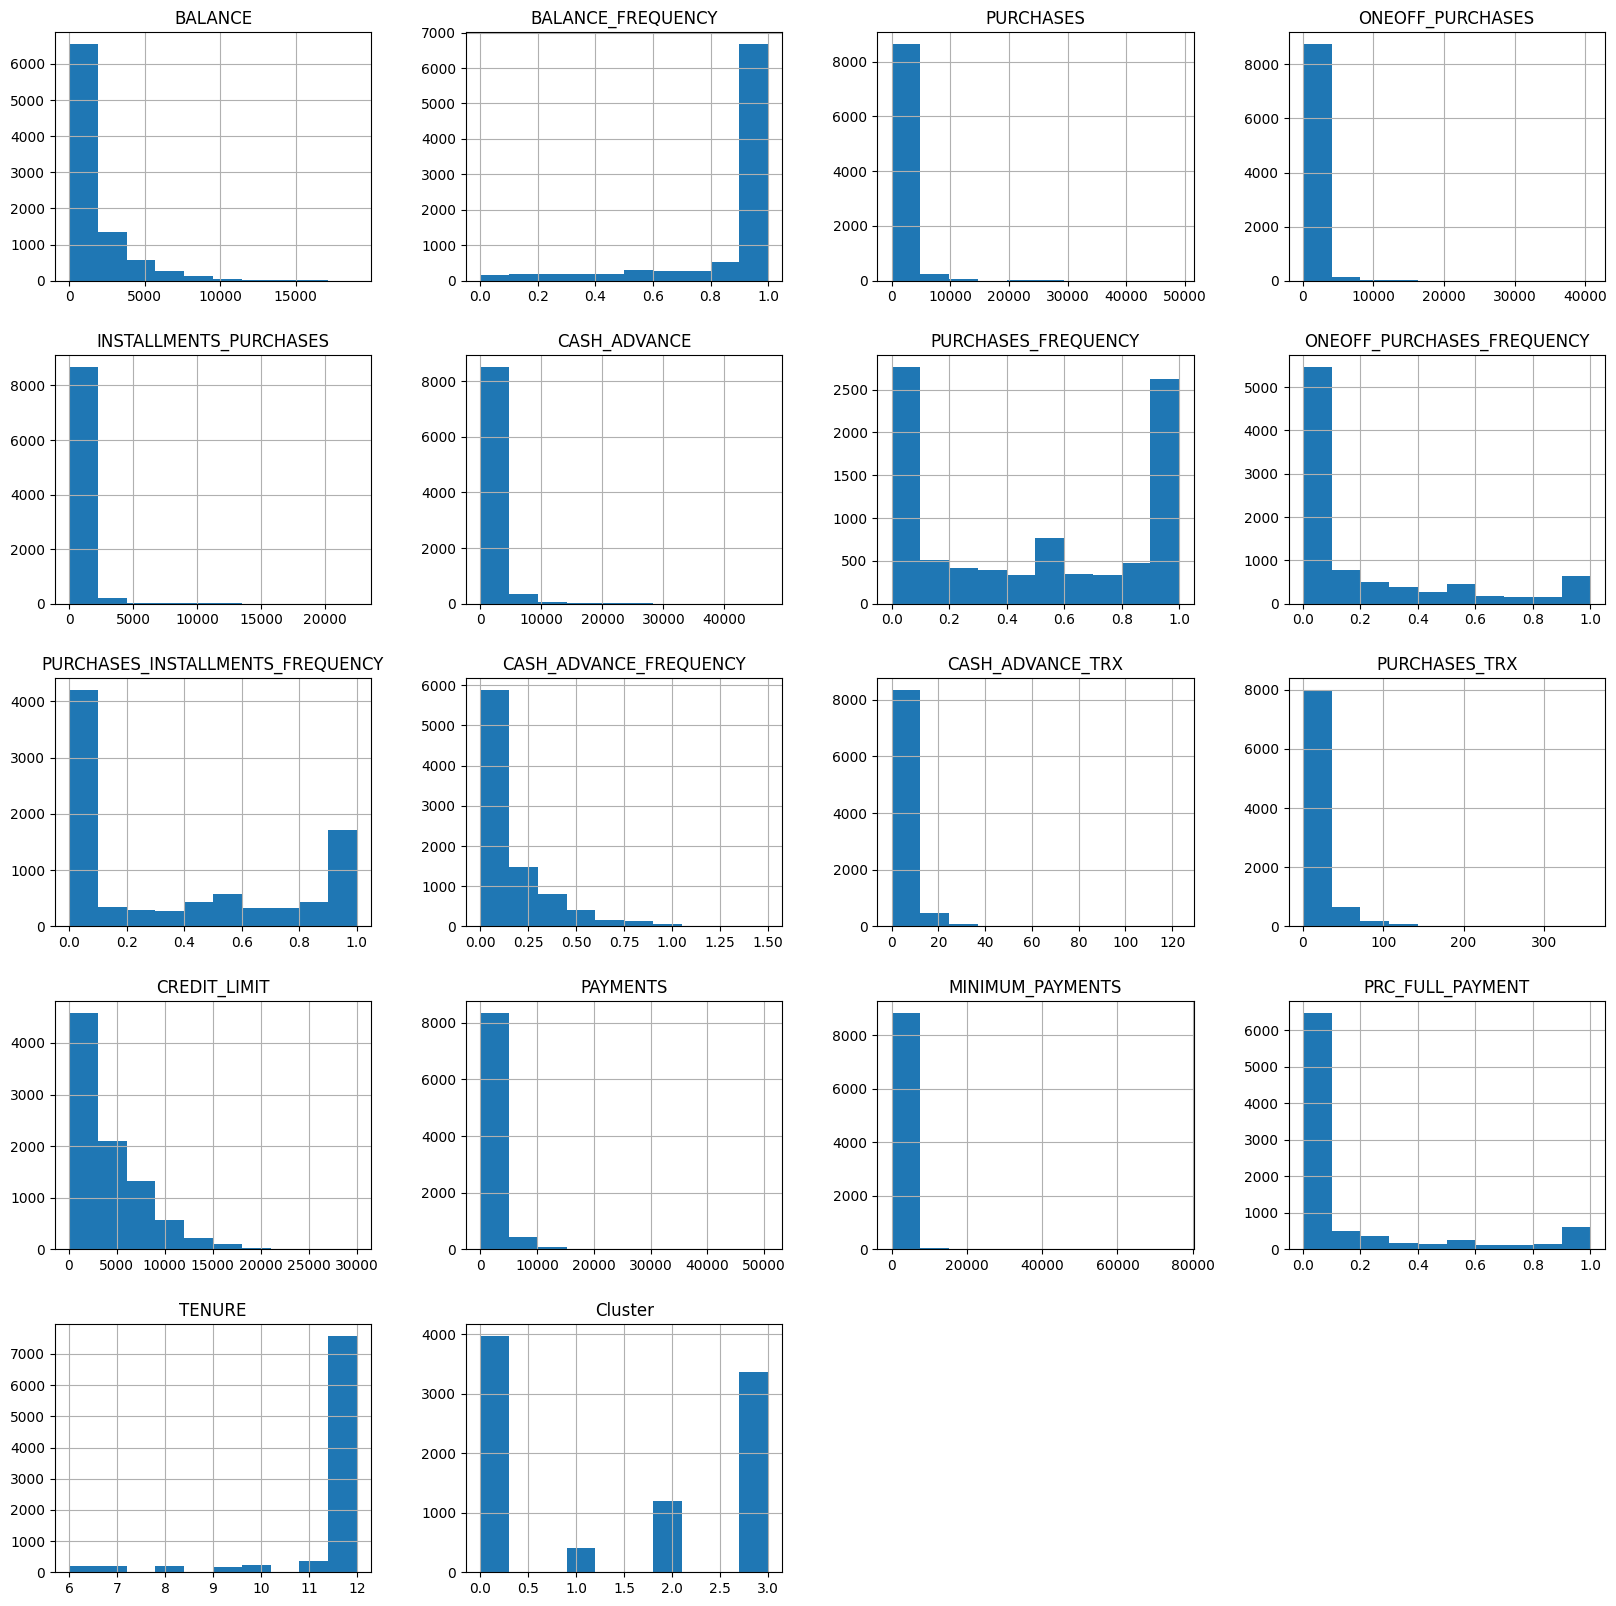

In [ ]:
df.hist(figsize=(20,20))

# Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

In [ ]:
[col for col in df.columns if col != 'Cluster']

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


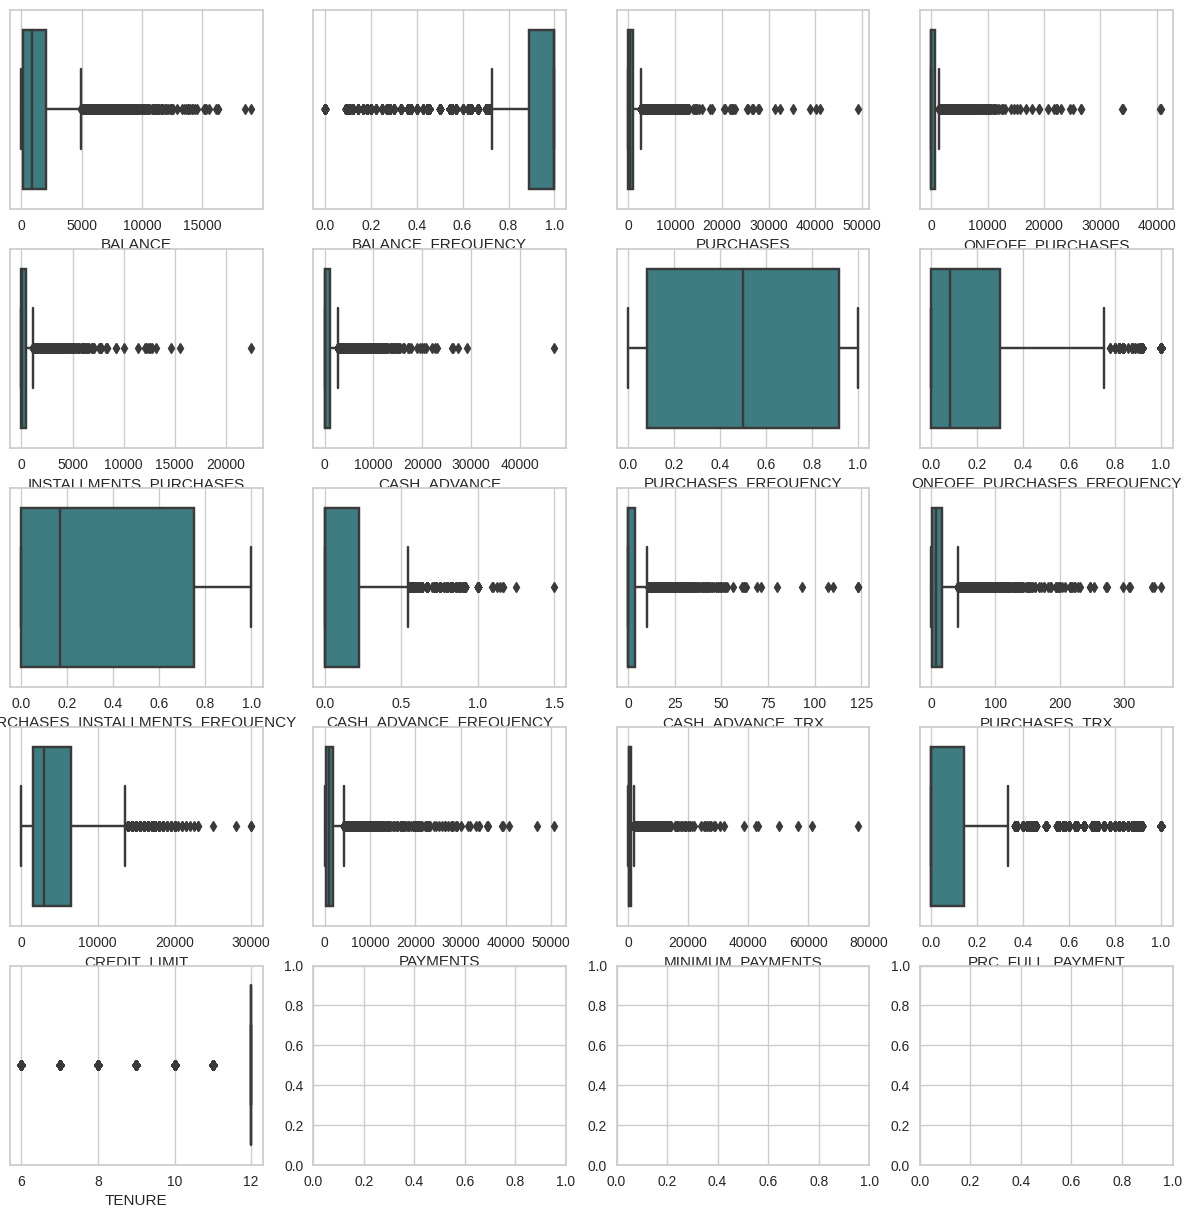

In [ ]:
import math
#Vẽ boxplot cho các continuous features
def draw_boxplot(df, cols, n_rows):
  n_cols = math.ceil(len(cols)/n_rows)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,15), sharex=False, sharey=False)
  for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, palette='crest', ax=axes[i//(math.ceil(len(cols)/n_rows)), i%n_cols])
continuous_columns = [col for col in df.columns if col != 'Cluster'] #[col for col in df.columns if df[col].dtypes=='float64']
print(continuous_columns)
draw_boxplot(df, continuous_columns,5)


In [ ]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count   8950.000000       8950.000000       8950.000000  8950.000000   
mean    1733.143852        864.206542          0.153715    11.517318   
std     2895.063757       2330.588021          0.292499     1.338331   
min        0.000000          0.019163          0.000000     6.000000   
25%      383.276166        170.857654          0.000000    12.000000   
50%      856.901546        335.628312          0.000000    12.000000   
75%     1901.134317        864.206542          0.142857    12.000000   
max    50721.483360      76406.207520          1.000000    12.000000   

           Cluster  
count  8950.000000  
mean      1.442011  
std       1.373951  
min       0.000000  
25%       0.000000  
50%       2.000000  
75%       3.000000  
max       3.000000

<Axes: >

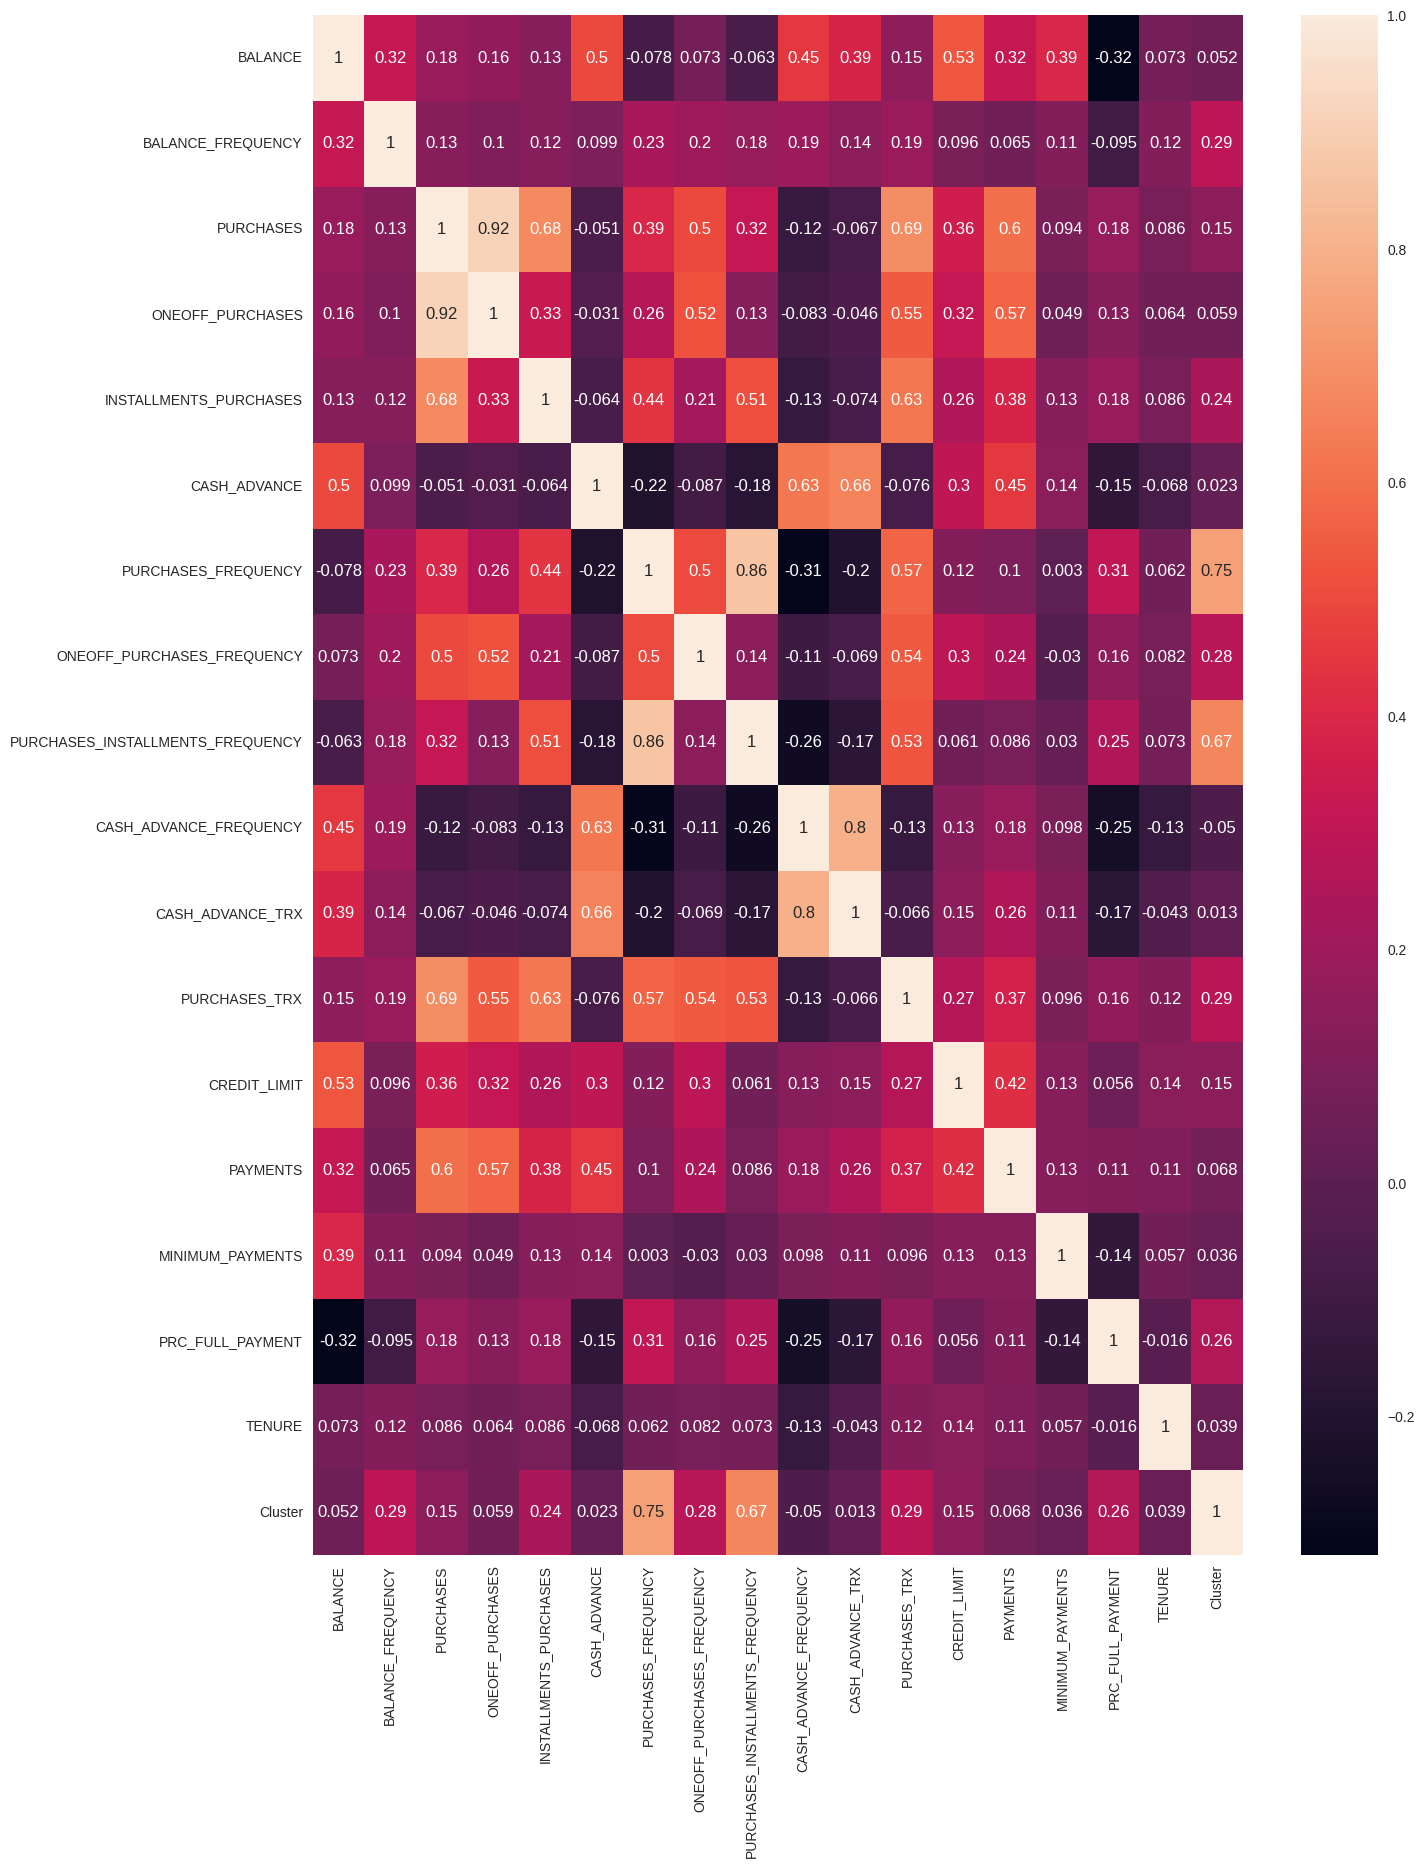

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

# Data Preprocessing

In [ ]:
data = df.copy()

In [ ]:
def preprocessing_data(df):
  df.drop('Cluster', axis=1, inplace=True)
  return df
data = preprocessing_data(data)

In [ ]:
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Feature Engineering

In [ ]:
def iqr_capping(df, cols):
  for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_whisker = q3 + 1.5*iqr
    lower_whisker = q1 - 1.5*iqr
    df[col] =np.where(df[col]>upper_whisker, upper_whisker, np.where(df[col]<lower_whisker, lower_whisker, df[col]))
  return df

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
def apply_feature_engineering(df):
  data = iqr_capping(df, df.columns[:-2]) #capping outliers
  return data
data = apply_feature_engineering(data)

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

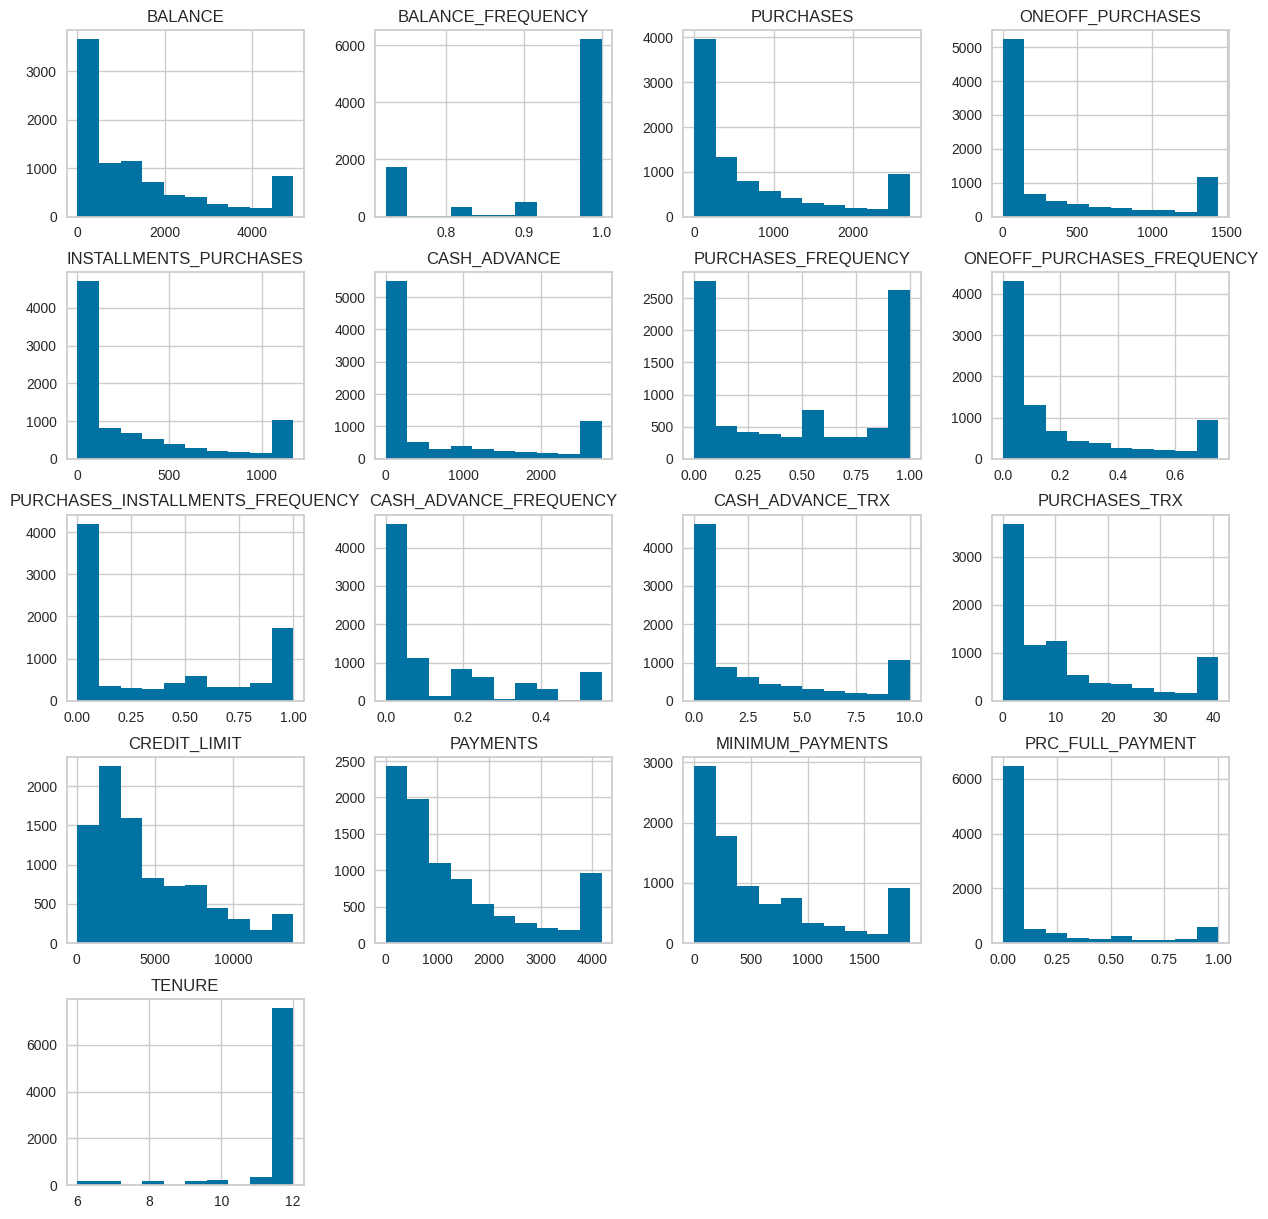

In [ ]:
data.hist(figsize = (15,15))

# Determine Cluster Number with and without Dimensional Reduction

##Without Dimensional Reduction

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
scaled_data

array([[-0.87782104, -1.02187519, -0.72968709, ..., -0.79404745,
        -0.52555097,  0.36067954],
       [ 1.1785459 , -0.2027079 , -0.83815959, ...,  0.83675109,
         0.2342269 ,  0.36067954],
       [ 0.71848713,  0.61645939,  0.04095652, ...,  0.05869355,
        -0.52555097,  0.36067954],
       ...,
       [-0.88920486, -0.88535181, -0.67397271, ..., -0.89385616,
         0.32919999, -4.12276757],
       [-0.89567082, -0.88535181, -0.83815959, ..., -0.94046866,
         0.32919999, -4.12276757],
       [-0.66200474, -1.88655177,  0.40489651, ..., -0.88359305,
        -0.52555097, -4.12276757]])

## Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

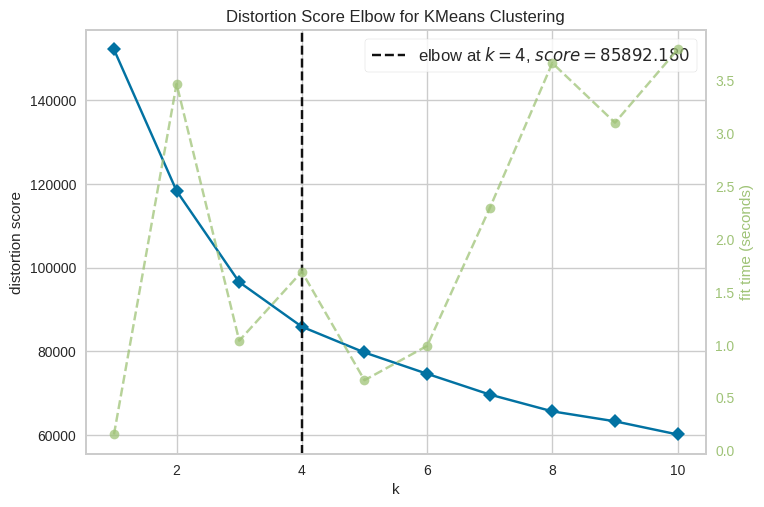

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow_method = KElbowVisualizer(KMeans(), k=(1,11))
elbow_method.fit(scaled_data)
elbow_method.show()

## Silhouette Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score with n_clusters = 2: 	 0.2229672501921028


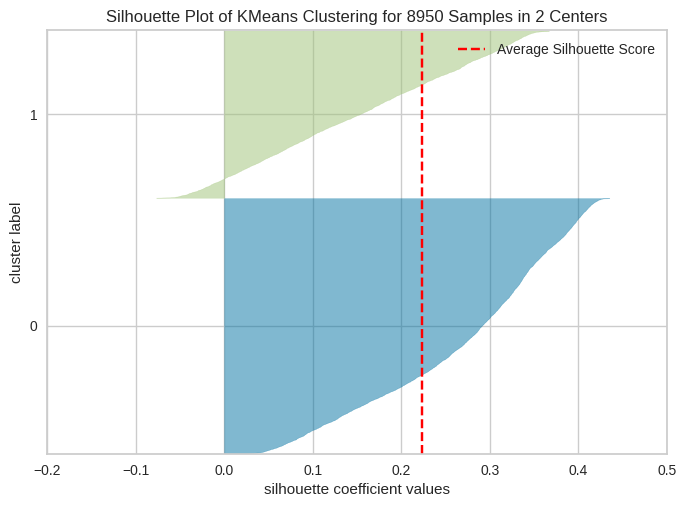

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score with n_clusters = 3: 	 0.22432266659648506


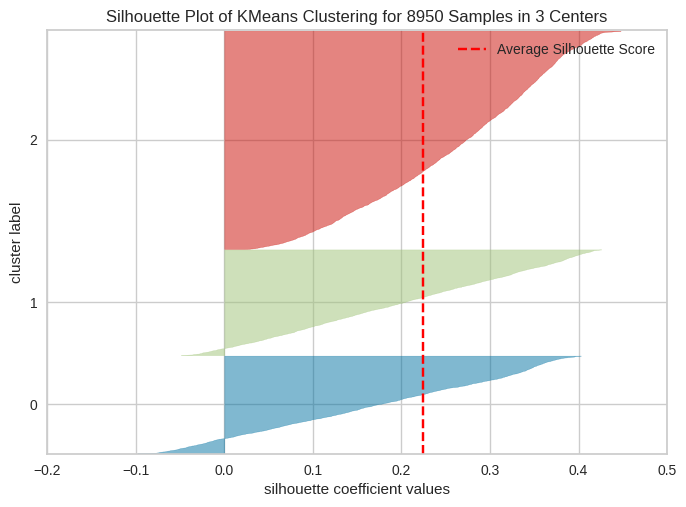

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score with n_clusters = 4: 	 0.1962681159190259


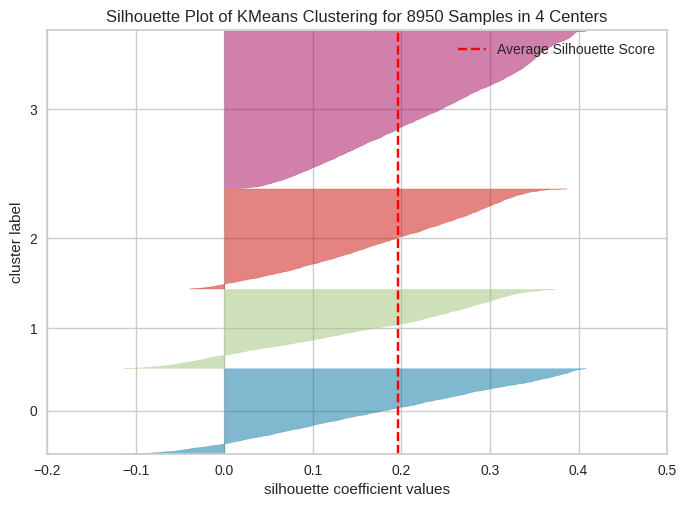

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score with n_clusters = 5: 	 0.18422328240390998


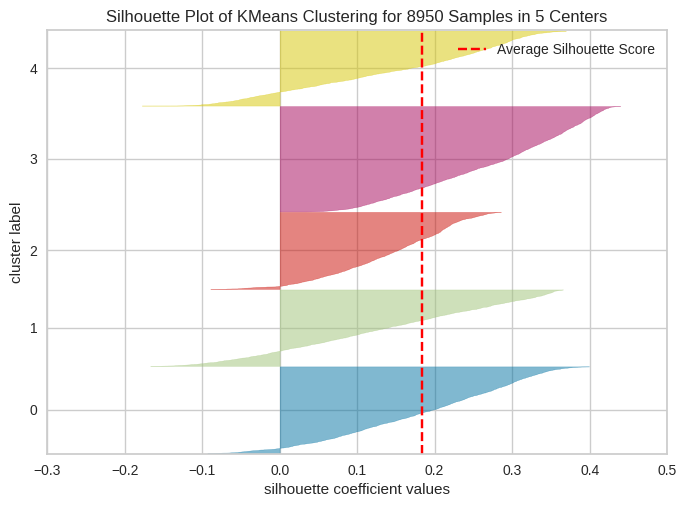

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score with n_clusters = 6: 	 0.18497095897903015


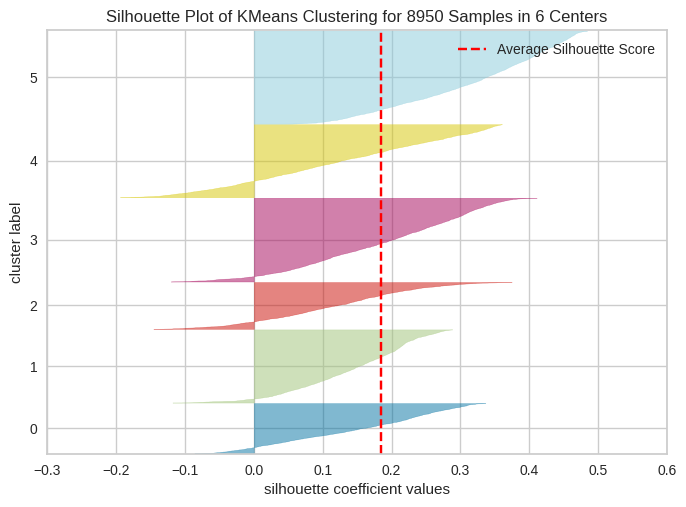

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2,7):
  visualizer = SilhouetteVisualizer(KMeans(i), colors='yellowbrick')
  visualizer.fit(scaled_data)
  print("Silhouette score with n_clusters = {}: \t {}".format(i, visualizer.silhouette_score_))
  visualizer.show()

Avg Silhouette Score ứng với số lượng các cluster khác nhau không có sự khác biệt lớn, trong đó n_clusters = 3 và n_clusters = 2 có giá trị Avg Sillhouette lớn nhất. Ta cũng có thể thấy với n_clusters = 3 và n_clusters = 2, các điểm với silhouette values âm có vẻ cũng là ít nhất. Do đó, ứng với Silhouette Method, ta có n_clusters = 2 và 3 mang đến kết quả tốt nhất  

##With Dimensional Reduction

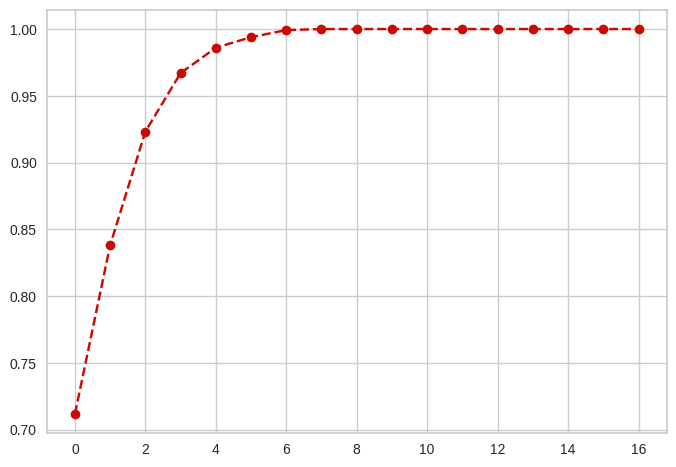

In [ ]:
pca = PCA()
pca.fit(data)
explained_ratio = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_ratio),'ro--')

Ta sử dụng PCA với n_components = 4 để giảm chiều dữ liệu, do chỉ với 4 components nhưng dữ liệu vẫn giữ được hơn 95% ý nghĩa

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA(n_components = 4)
data_pca = pca.fit_transform(scaled_data)

##Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

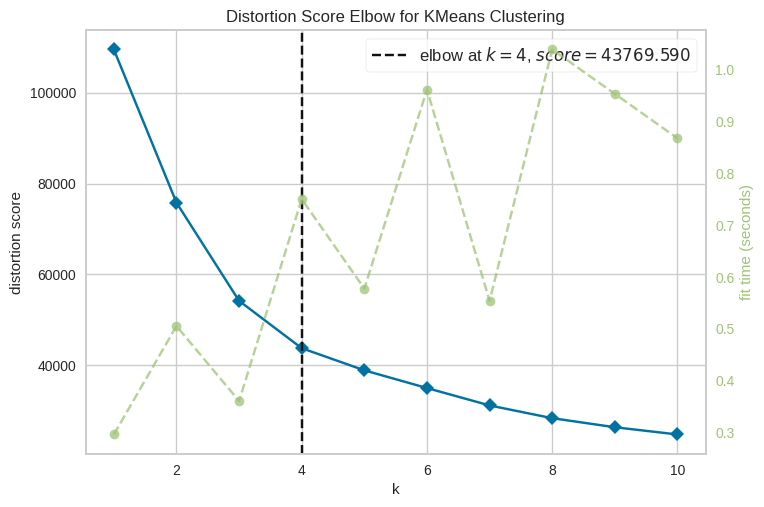

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow_method = KElbowVisualizer(KMeans(), k=(1,11))
elbow_method.fit(data_pca)
elbow_method.show()

Nhận xét: Sau khi giảm chiều dữ liệu, distortion score với k = 4 đã giảm từ 85892 xuống 43770

##Silhouette Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score with n_clusters = 2: 	 0.3009677811337427


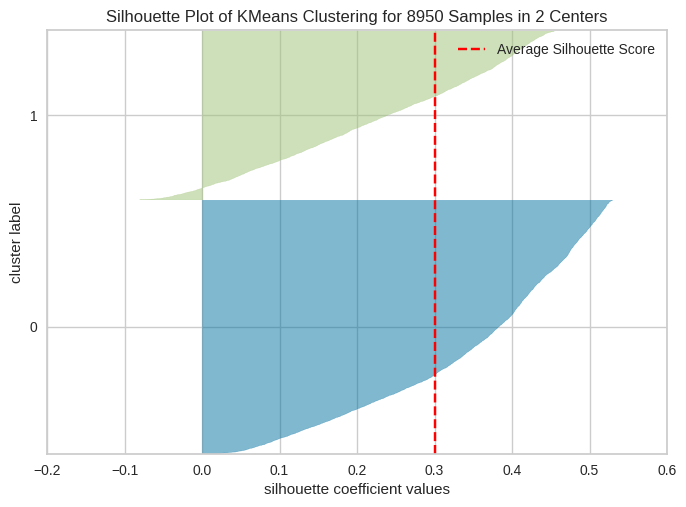

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score with n_clusters = 3: 	 0.31784143102525964


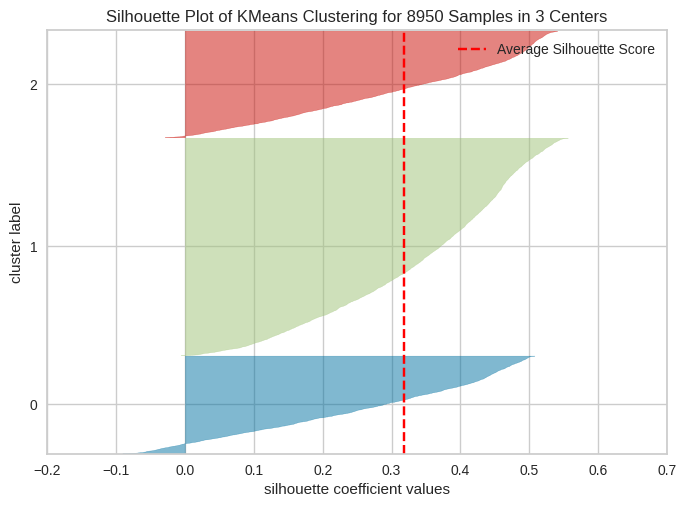

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score with n_clusters = 4: 	 0.30604137420737393


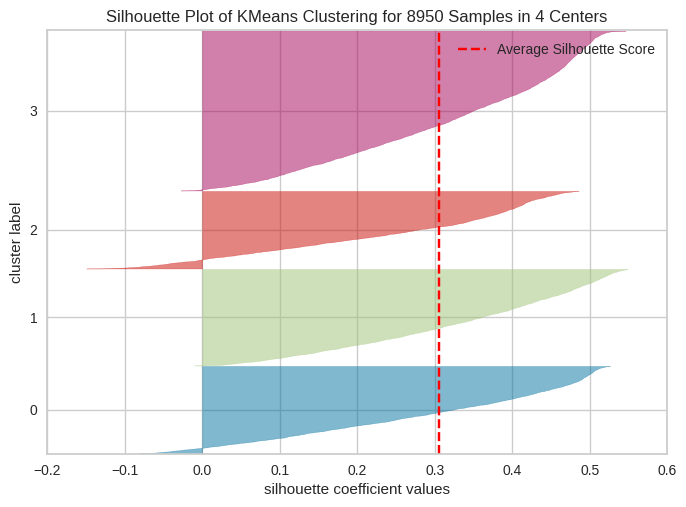

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score with n_clusters = 5: 	 0.30763601435161253


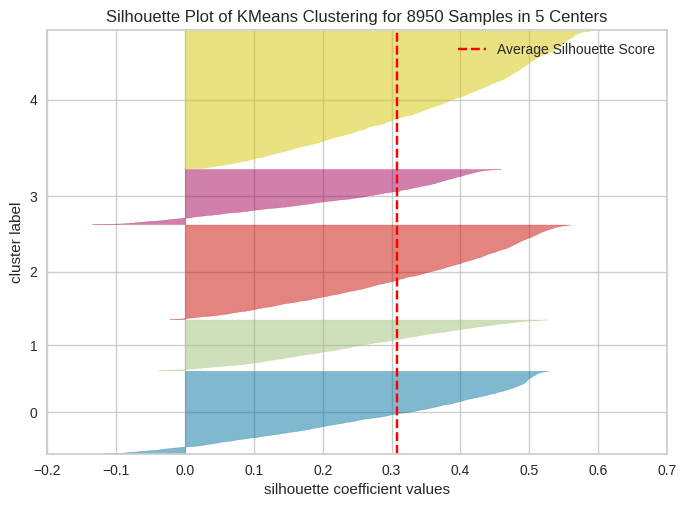

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score with n_clusters = 6: 	 0.307461466993157


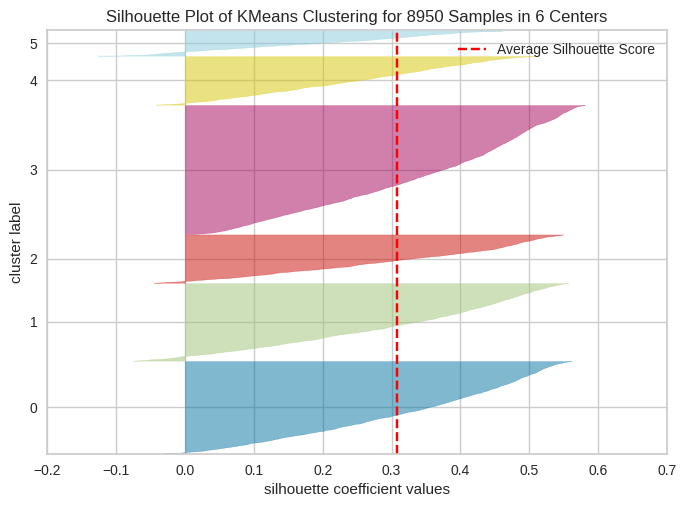

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2,7):
  visualizer = SilhouetteVisualizer(KMeans(i), colors='yellowbrick')
  visualizer.fit(data_pca)
  print("Silhouette score with n_clusters = {}: \t {}".format(i, visualizer.silhouette_score_))
  visualizer.show()

Nhận xét:
Sau khi giảm chiều dữ liệu, Avg Silhouette Score của các n_clusters đều tăng lên, trung bình tăng từ 0.2 lên 0.3. Với n_clusters = 3, các điểm dữ liệu với silhouette score < 0 cũng giảm đi đáng kể.

##Kết luận: Ta sẽ sử dụng PCA để giảm chiều dữ liệu với n_components = 4

# Model Part

In [ ]:
from sklearn.pipeline import Pipeline
def build_kmeans_model(X, k):
  kmeans = KMeans(k)
  pca = PCA(n_components = 4)
  pipeline = Pipeline(steps=[
      ('pca', pca),
      ('kmeans', kmeans)
  ])
  pipeline.fit(X)
  return pipeline

##Measure performance and chosing n_clusters

###Với k=4 từ Elbow Method

In [ ]:
model = build_kmeans_model(scaled_data, 4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
model

Pipeline(steps=[('pca', PCA(n_components=4)), ('kmeans', KMeans(n_clusters=4))])

In [ ]:
model['kmeans'].cluster_centers_

array([[-1.2702917 , -1.12234884,  0.55018276, -0.36069548],
       [-2.06119671,  2.51442918, -0.18493106,  0.43844051],
       [ 3.54857946,  1.18748008,  0.78687592, -0.06399201],
       [ 1.11544453, -1.37158662, -1.37468799,  0.25141994]])

In [ ]:
pca = PCA(n_components=3)
pca_3d_4cluster = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])

In [ ]:
pca_3d_4cluster

pca_1     pca_2     pca_3
0    -1.618571 -2.400199  0.266463
1    -2.268181  2.439734  0.490864
2     1.220882  0.241512  1.563012
3    -0.477727 -0.211594  2.289092
4    -1.621178 -1.618325  0.231494
...        ...       ...       ...
8945  0.189178 -2.605022 -1.440929
8946 -0.120282 -1.833657 -1.855063
8947 -0.609018 -2.846345 -0.764765
8948 -2.561237 -2.310715  0.588283
8949  0.193260 -0.934337  2.393162

[8950 rows x 3 columns]

In [ ]:
labels_4cluster = model['kmeans'].labels_

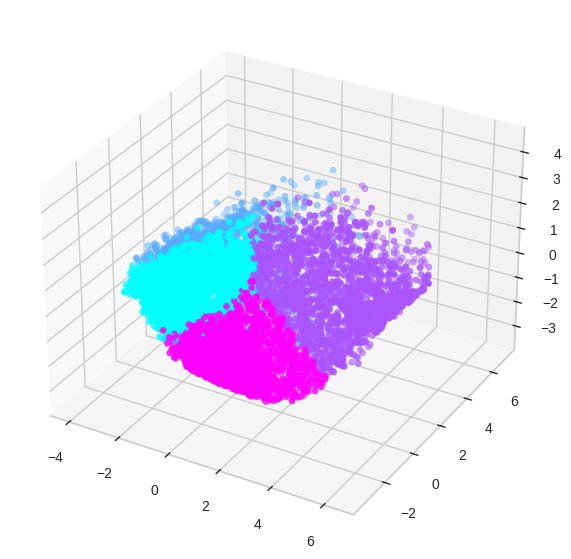

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_3d_4cluster.pca_1, pca_3d_4cluster.pca_2, pca_3d_4cluster.pca_3, c=labels_4cluster, cmap="cool")
plt.show()

In [ ]:
pca = PCA(n_components=2)
pca_2d_4cluster = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca1", "pca2"])

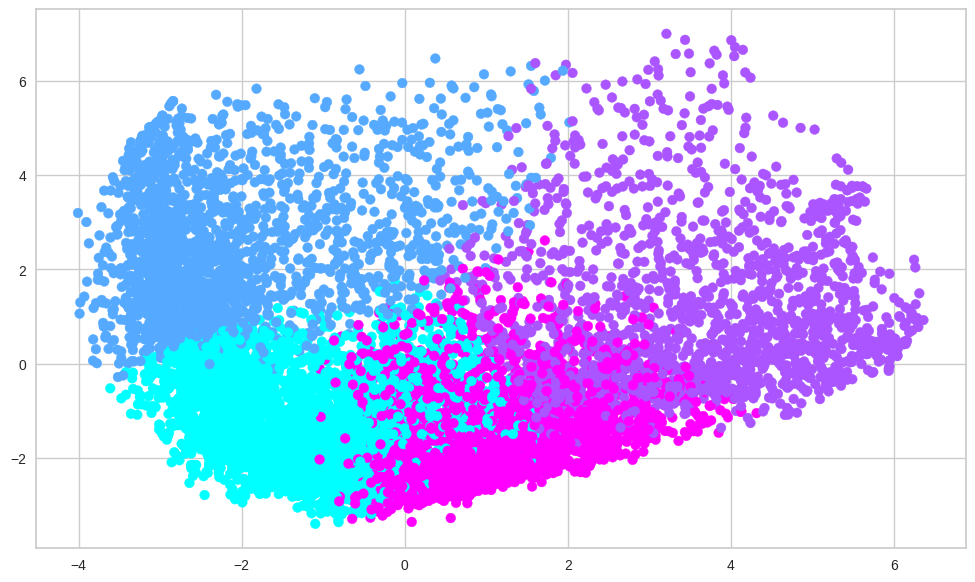

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_2d_4cluster.pca1, pca_2d_4cluster.pca2, c=labels_4cluster, cmap="cool")
plt.show()

###So sánh với n_clusters = 3 và 2 từ Silhouette Method

In [ ]:
model = build_kmeans_model(scaled_data, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels_3cluster = model['kmeans'].labels_

In [ ]:
pca = PCA(n_components=3)
pca_3d_3cluster = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])
pca_3d_3cluster

pca_1     pca_2     pca_3
0    -1.618571 -2.400199  0.266469
1    -2.268181  2.439734  0.490870
2     1.220882  0.241512  1.562975
3    -0.477727 -0.211594  2.289054
4    -1.621178 -1.618325  0.231503
...        ...       ...       ...
8945  0.189178 -2.605022 -1.440947
8946 -0.120281 -1.833657 -1.855089
8947 -0.609018 -2.846345 -0.764772
8948 -2.561237 -2.310715  0.588317
8949  0.193260 -0.934337  2.393198

[8950 rows x 3 columns]

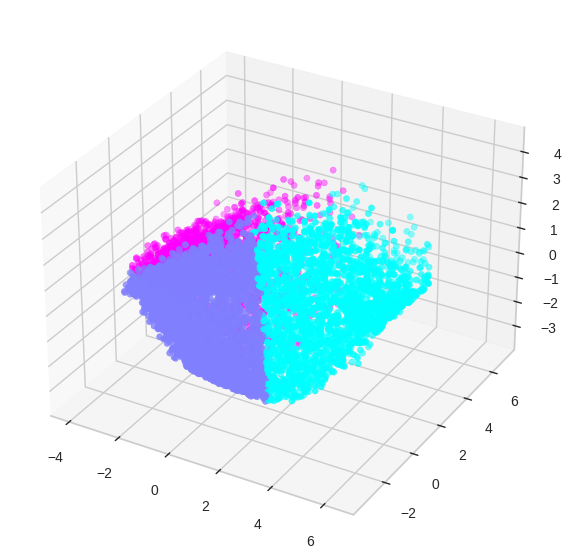

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_3d_3cluster.pca_1, pca_3d_3cluster.pca_2, pca_3d_3cluster.pca_3, c=labels_3cluster, cmap="cool")
plt.show()

In [ ]:
pca = PCA(n_components=2)
pca_2d_3cluster = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca1", "pca2"])

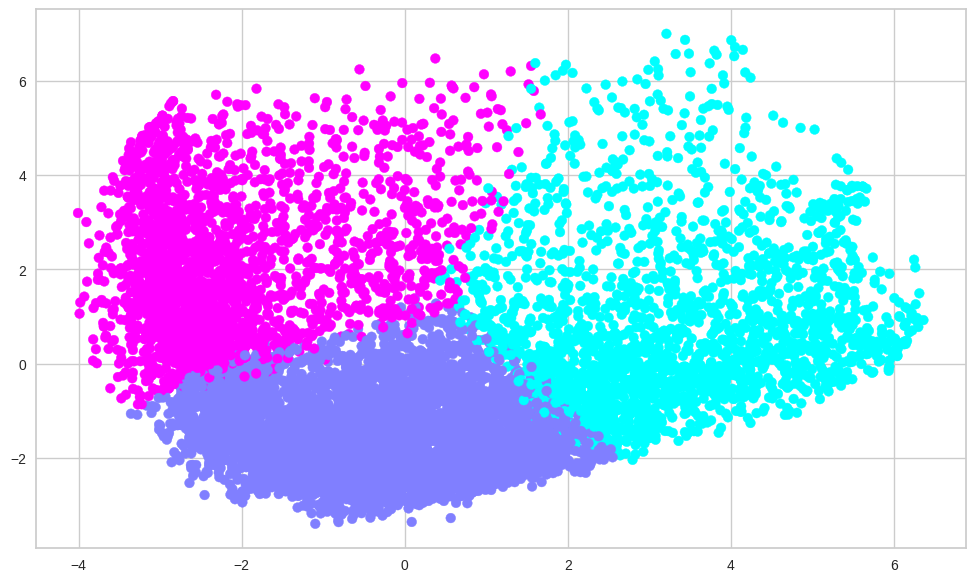

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_2d_3cluster.pca1, pca_2d_3cluster.pca2, c=labels_3cluster, cmap="cool")
plt.show()

In [ ]:
model = build_kmeans_model(scaled_data, 2)
model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('pca', PCA(n_components=4)), ('kmeans', KMeans(n_clusters=2))])

In [ ]:
labels_2cluster = model['kmeans'].labels_

In [ ]:
pca = PCA(n_components=3)
pca_3d_2cluster = pd.DataFrame(pca.fit_transform(data_pca), columns=["pca_1", "pca_2", "pca_3"])
pca_3d_2cluster

pca_1     pca_2     pca_3
0    -1.618571 -2.400199  0.266465
1    -2.268181  2.439734  0.490866
2     1.220882  0.241512  1.563028
3    -0.477727 -0.211594  2.289090
4    -1.621178 -1.618325  0.231492
...        ...       ...       ...
8945  0.189178 -2.605022 -1.440930
8946 -0.120282 -1.833657 -1.855067
8947 -0.609018 -2.846345 -0.764764
8948 -2.561237 -2.310715  0.588278
8949  0.193260 -0.934337  2.393172

[8950 rows x 3 columns]

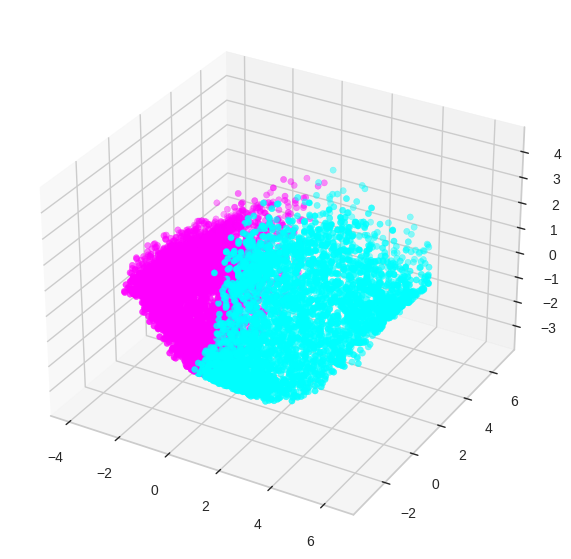

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_3d_2cluster.pca_1, pca_3d_2cluster.pca_2, pca_3d_2cluster.pca_3, c=labels_2cluster, cmap="cool")
plt.show()

In [ ]:
pca = PCA(n_components=2)
pca_2d_2cluster = pd.DataFrame(pca.fit_transform(datascaled_datapca), columns=["pca1", "pca2"])

NameError: ignored

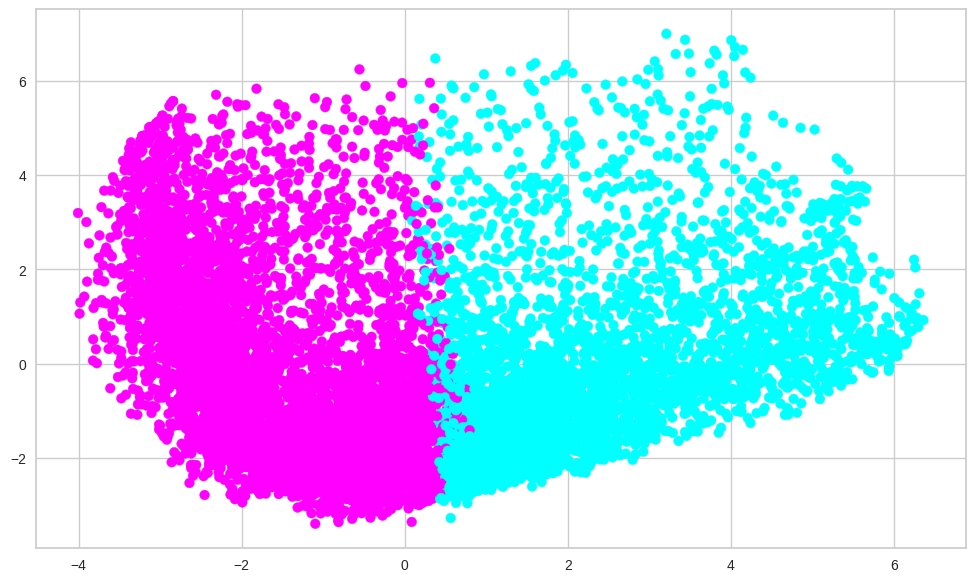

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_2d_2cluster.pca1, pca_2d_2cluster.pca2, c=labels_2cluster, cmap="cool")
plt.show()

##So sánh các n_clusters

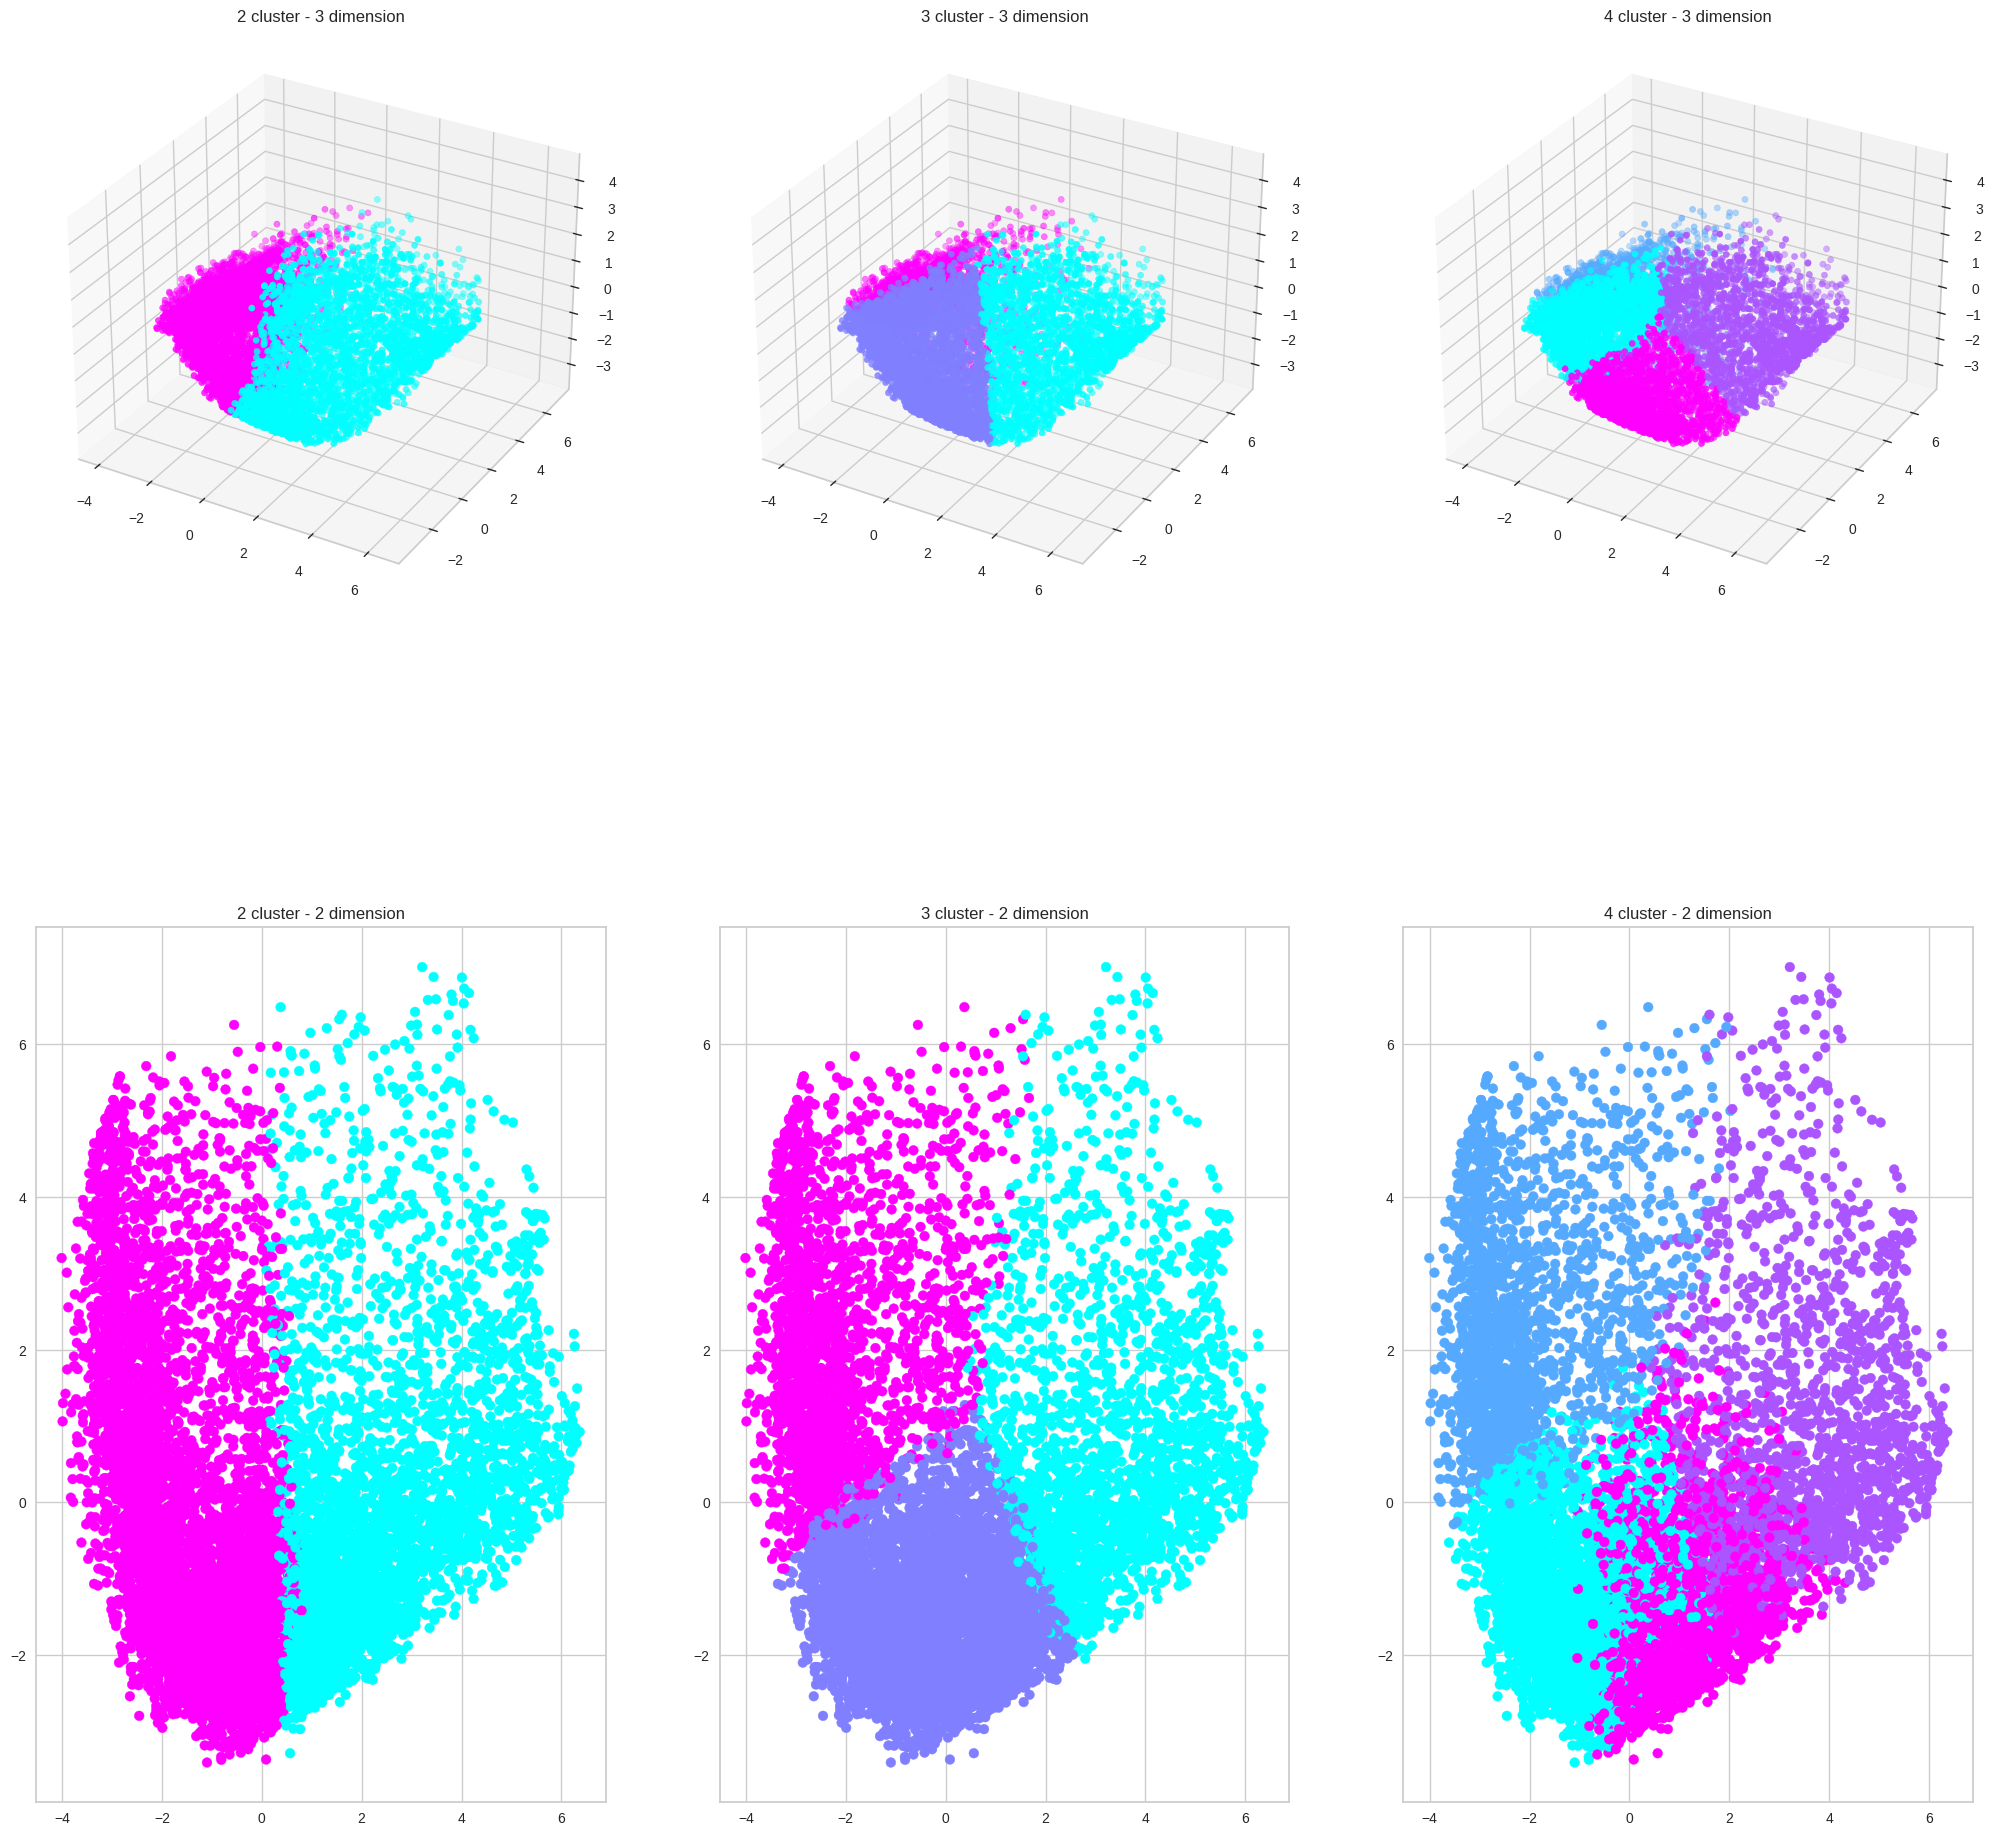

In [ ]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(2,3,1, projection='3d')
ax.scatter(pca_3d_2cluster.pca_1, pca_3d_2cluster.pca_2, pca_3d_2cluster.pca_3, c=labels_2cluster, cmap="cool")
ax.set_title("2 cluster - 3 dimension")

ax = fig.add_subplot(2,3,2,projection='3d')
ax.scatter(pca_3d_3cluster.pca_1, pca_3d_3cluster.pca_2, pca_3d_3cluster.pca_3, c=labels_3cluster, cmap="cool")
ax.set_title("3 cluster - 3 dimension")

ax = fig.add_subplot(2,3,3, projection='3d')
ax.scatter(pca_3d_4cluster.pca_1, pca_3d_4cluster.pca_2, pca_3d_4cluster.pca_3, c=labels_4cluster, cmap="cool")
ax.set_title("4 cluster - 3 dimension")

ax = fig.add_subplot(2,3,4)
ax.scatter(pca_2d_2cluster.pca1, pca_2d_2cluster.pca2, c=labels_2cluster, cmap="cool")
ax.set_title("2 cluster - 2 dimension")

ax = fig.add_subplot(2,3,5)
ax.scatter(pca_2d_3cluster.pca1, pca_2d_3cluster.pca2, c=labels_3cluster, cmap="cool")
ax.set_title("3 cluster - 2 dimension")

ax = fig.add_subplot(2,3,6)
ax.scatter(pca_2d_4cluster.pca1, pca_2d_4cluster.pca2, c=labels_4cluster, cmap="cool")
ax.set_title("4 cluster - 2 dimension")
plt.show()

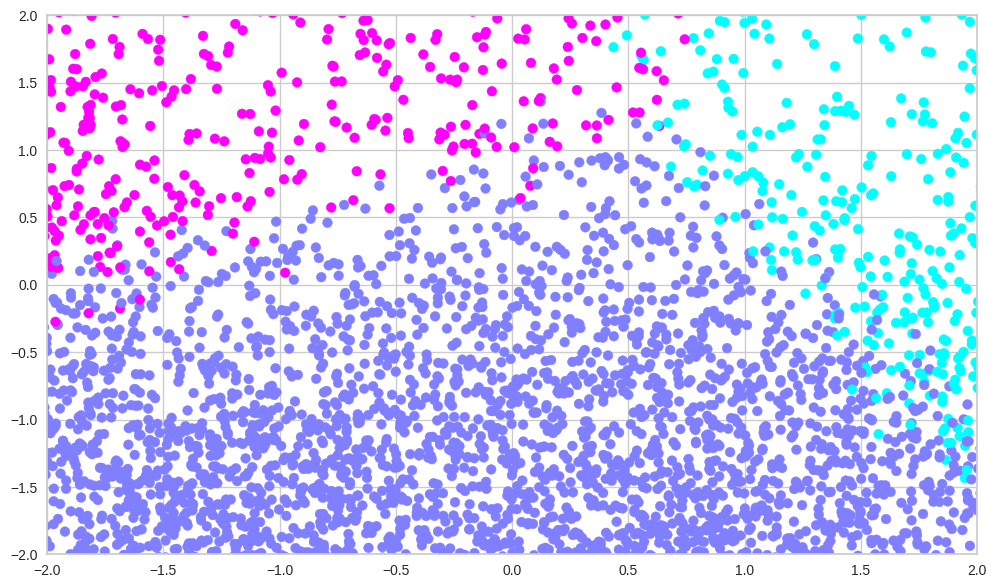

In [ ]:
#plot vùng bị overlap với n_clusters = 3
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_3d_4cluster.pca_1, pca_3d_4cluster.pca_2, c=labels_3cluster, cmap="cool")
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()

###Kết luận

Với n_clusters = 4, trực quan ta thấy số điểm dữ liệu khác cluster overlap nhau khá nhiều.
Với n_clusters = 3, số điểm dữ liệu khác cluster chỉ overlap nhau ở biên của các cluster và số lượng điểm bị overlap này cũng không nhiều.
Với n_cluster = 2, ta có kết luận tương tự n_clusters = 3.
Chọn n_cluster = 3 vì có silhouette score cao nhất.

In [ ]:
final_model = build_kmeans_model(scaled_data, 3)
df['Cluster'] = final_model['kmeans'].labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Discussion & Conclusion

Conclusion: Model chính là Kmeans với tham số n_clusters = 3. Mô hình có scale lại dữ liệu bằng StandardScaler và giảm chiều dữ liệu bằng PCA với n_components = 4.

Discussion

In [ ]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        2  
3     0.000000        864.206542          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

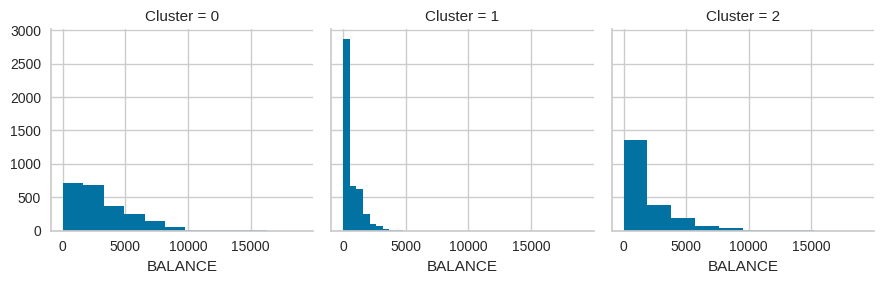

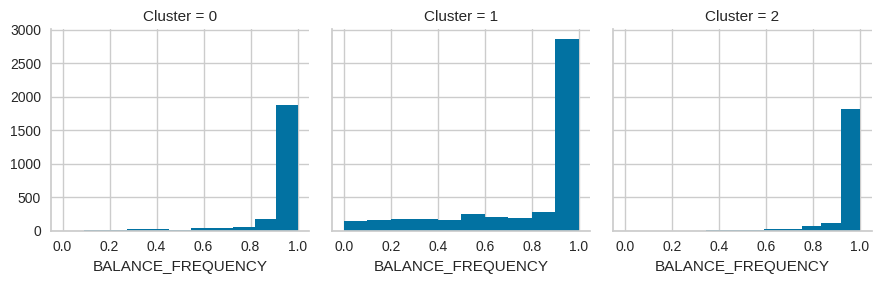

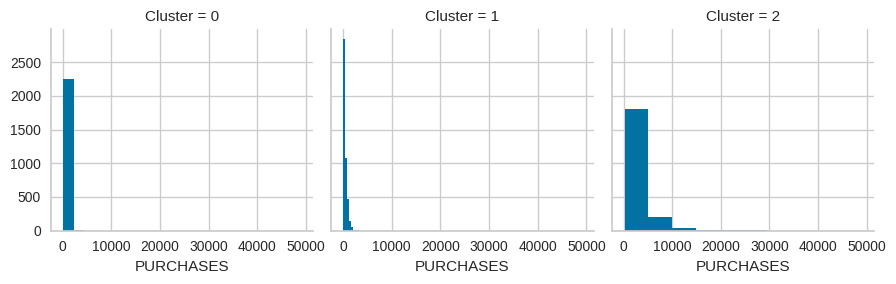

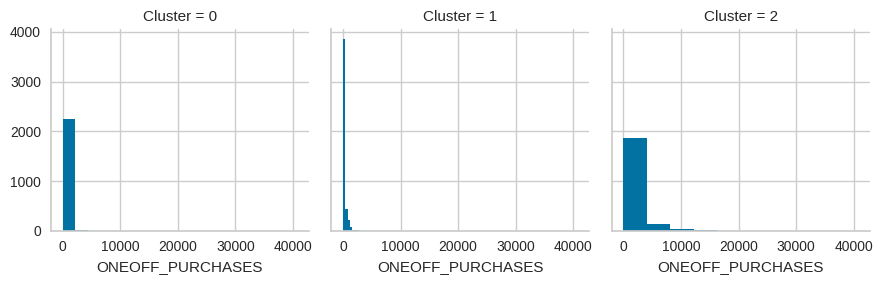

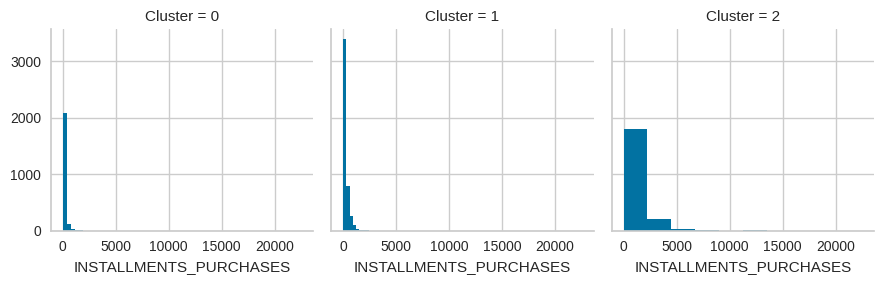

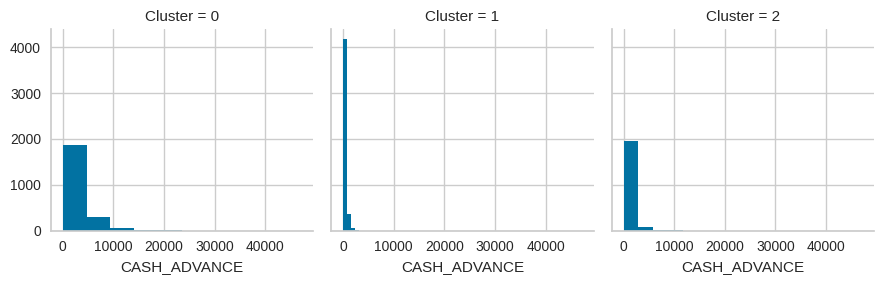

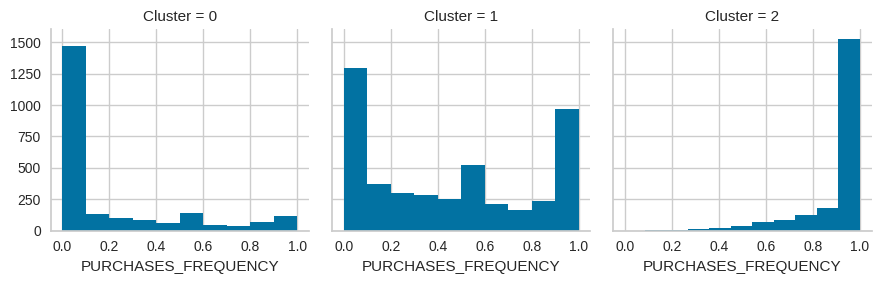

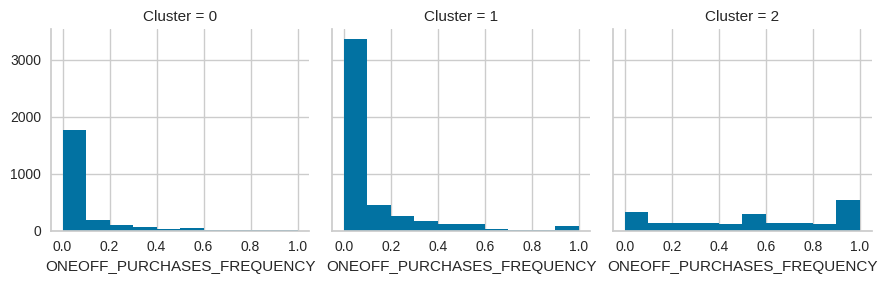

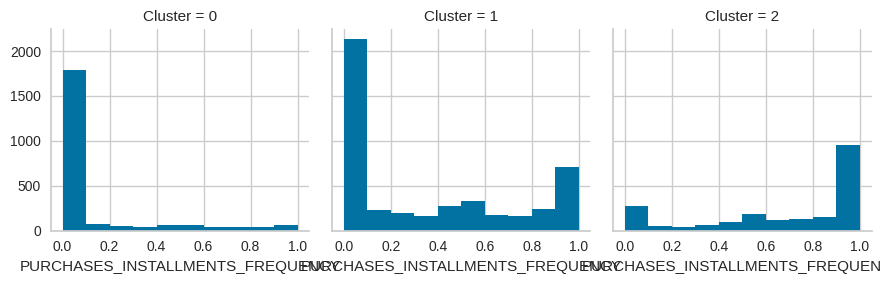

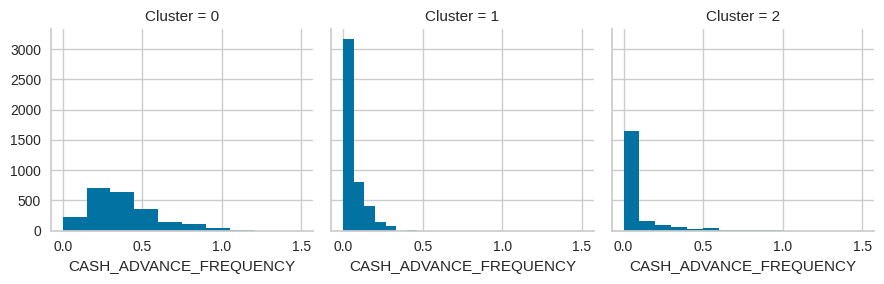

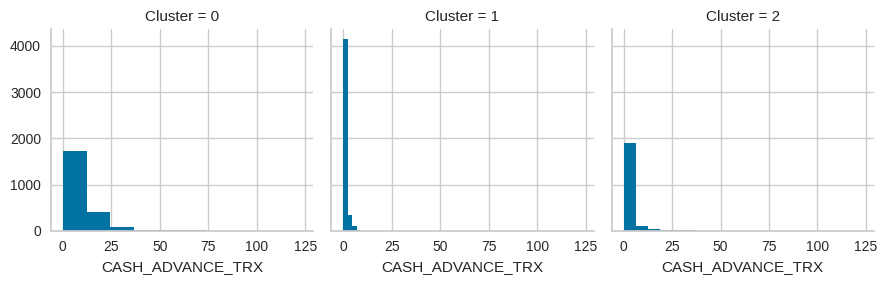

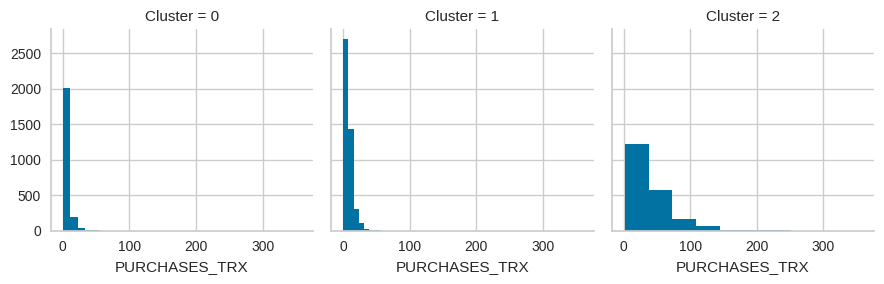

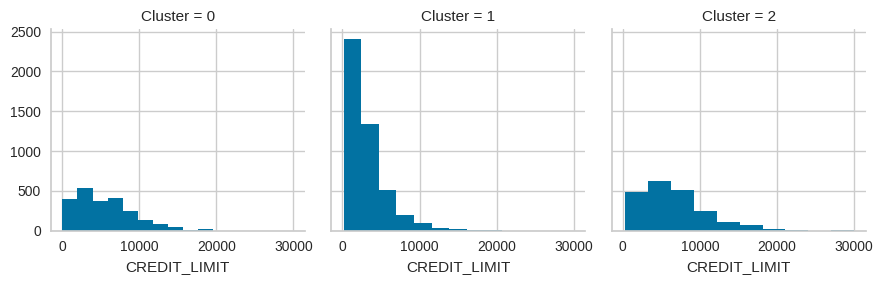

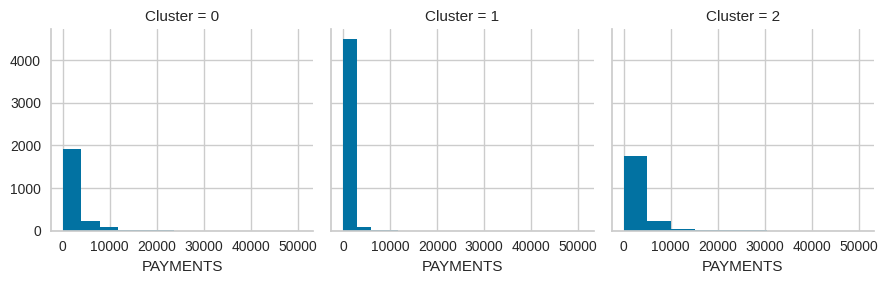

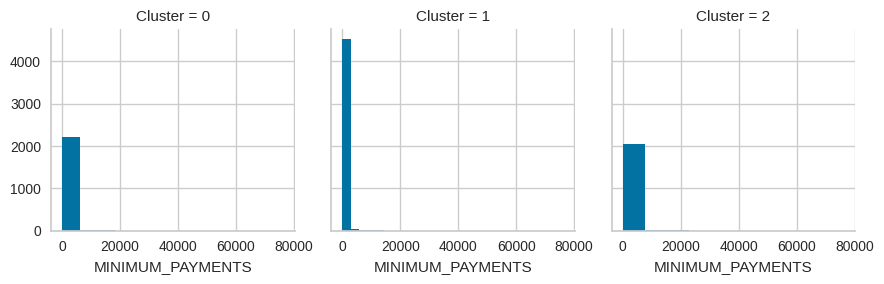

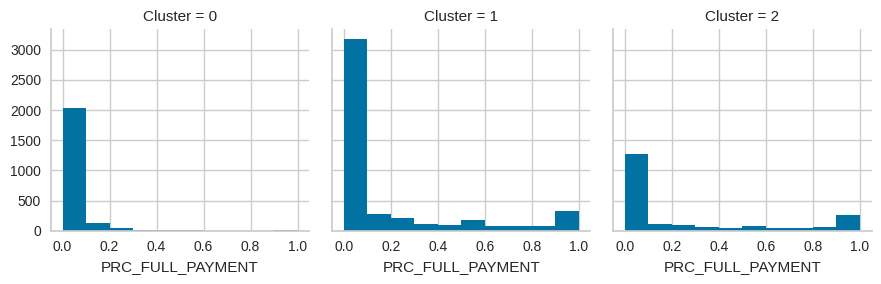

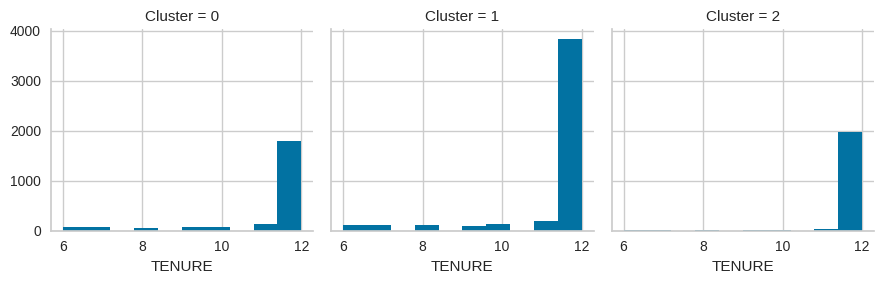

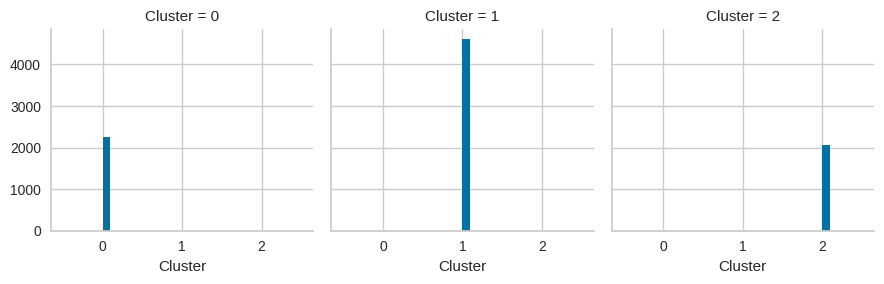

In [ ]:
#compare each cluster
for c in df:
  grid = sns.FacetGrid(df, col = 'Cluster')
  grid.map(plt.hist, c)